In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import precision_score, recall_score
from collections import defaultdict
import pickle

In [2]:
CLF_NUMBER = [83, 43, 81, 8, 77, 66, 40]

thresholds_elmo = {
    83: 0.7,
    40: 0.53,
    43: 0.6,
    81: 0.6,
    8: 0.5,
    77: 0.5,
    66: 0.6,
}

In [3]:
path_transformers = 'pr_rc_data/transformers/'
transformers_files = [f for f in listdir(path_transformers) if isfile(join(path_transformers, f))]

path_elmo = 'pr_rc_data/elmo/'
elmo_files = [f for f in listdir(path_elmo) if isfile(join(path_elmo, f))]

In [10]:
d_elmo_metrics = defaultdict()
for clf_n in CLF_NUMBER:
    for e_file in elmo_files:
        if f'{str(clf_n)}_' in e_file:
            with open(f'{path_elmo}{e_file}', 'rb') as f:
                y, predictions = pickle.load(f)             
            pred = [1 if x >= thresholds_elmo[clf_n] else 0 for x in predictions]
            recall = recall_score(y, pred, pos_label=1)
            precision = precision_score(y, pred, pos_label=1)            
            d_elmo_metrics[clf_n] = (recall, classification_report(y, pred), precision)
            

In [11]:
d = defaultdict(dict)
for clf_n in CLF_NUMBER:
    clf_files = [x for x in transformers_files if x.startswith(f'{clf_n}_')]    
    for file in clf_files:
        if 'ruBert-large_mlm_False' in file:
            with open(f'{path_transformers}{file}', 'rb') as f:
                pred, y = pickle.load(f)
            d[clf_n]['ruBert'] = (y, pred)
            
        if 'ruBert-large_mlm_TRUE' in file:
            with open(f'{path_transformers}{file}', 'rb') as f:
                pred, y = pickle.load(f)
            d[clf_n]['ruBert+mlm'] = (y, pred)
            
        if 'ruRoberta-large' in file:
            with open(f'{path_transformers}{file}', 'rb') as f:
                pred, y = pickle.load(f)
            d[clf_n]['ruRoberta'] = (y, pred)
    for e_file in elmo_files:
        with open(f'{path_elmo}{e_file}', 'rb') as f:
            y, pred = pickle.load(f)  
        d[clf_n]['elmo'] = (y, pred)

In [12]:
def get_best_prec_f1(y, predictions, model_name, elmo_recall, elmo_precision):
    thresholds = [.3, .4, .5, .6, .7, .8, .9]
    dict_thresholds = dict()
    dict_thresholds_near = dict()
    print(f'elmo_recall {elmo_recall}')
    print(f'elmo_precision {elmo_precision}\n')    
    for thrhld in thresholds:
        pred = [1 if x >= thrhld else 0 for x in predictions]
        precision = precision_score(y, pred)
        recall = recall_score(y, pred, pos_label=1)
        if recall >= elmo_recall:
            dict_thresholds[thrhld] = precision
        else:
            dict_thresholds_near[thrhld] = precision
    if len(dict_thresholds) > 0:
        max_value = max(dict_thresholds, key=dict_thresholds.get)
    else:
        print(f'!!!! ELMO is better model !!!!!!')
        max_value = max(dict_thresholds_near, key=dict_thresholds_near.get)
    print(f'model_name: {model_name}')
    print(f'threshold: {max_value}')
    print(classification_report(y, [1 if x >= max_value else 0 for x in predictions]))

########################
clf_id 83
model_name: ELMO
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       258
           1       0.87      0.73      0.80        56

    accuracy                           0.93       314
   macro avg       0.91      0.85      0.88       314
weighted avg       0.93      0.93      0.93       314

elmo_recall 0.7321428571428571
elmo_precision 0.8723404255319149

model_name: ruBert+mlm
threshold: 0.7
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       241
           1       0.93      0.78      0.85        73

    accuracy                           0.94       314
   macro avg       0.94      0.88      0.91       314
weighted avg       0.94      0.94      0.93       314

elmo_recall 0.7321428571428571
elmo_precision 0.8723404255319149

model_name: ruRoberta
threshold: 0.6
              precision    recall  f1-score   support

           0       0.96      0.9

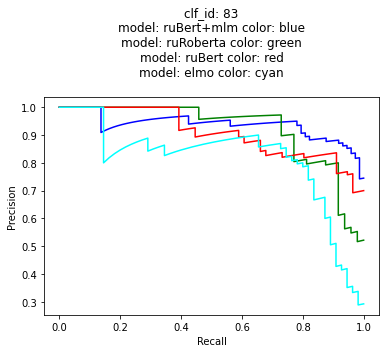

########################
clf_id 43
model_name: ELMO
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       228
           1       0.85      0.71      0.77        79

    accuracy                           0.89       307
   macro avg       0.88      0.83      0.85       307
weighted avg       0.89      0.89      0.89       307

elmo_recall 0.7088607594936709
elmo_precision 0.8484848484848485

model_name: ruBert+mlm
threshold: 0.8
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       215
           1       0.95      0.77      0.85        92

    accuracy                           0.92       307
   macro avg       0.93      0.88      0.90       307
weighted avg       0.92      0.92      0.92       307

elmo_recall 0.7088607594936709
elmo_precision 0.8484848484848485

model_name: ruBert
threshold: 0.8
              precision    recall  f1-score   support

           0       0.92      0.96  

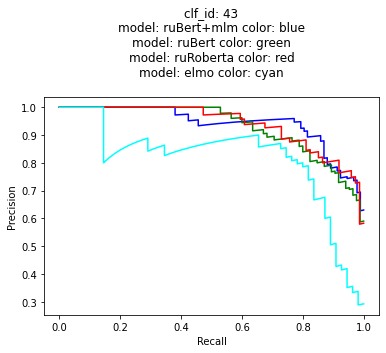

########################
clf_id 81
model_name: ELMO
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       302
           1       1.00      0.31      0.48        64

    accuracy                           0.88       366
   macro avg       0.94      0.66      0.70       366
weighted avg       0.90      0.88      0.85       366

elmo_recall 0.3125
elmo_precision 1.0

model_name: ruBert+mlm
threshold: 0.8
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       287
           1       0.99      0.85      0.91        79

    accuracy                           0.96       366
   macro avg       0.97      0.92      0.94       366
weighted avg       0.97      0.96      0.96       366

elmo_recall 0.3125
elmo_precision 1.0

model_name: ruRoberta
threshold: 0.9
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       282
           1       0.84      0.8

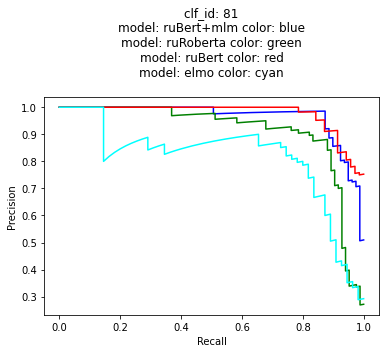

########################
clf_id 8
model_name: ELMO
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       326
           1       0.88      0.89      0.88        87

    accuracy                           0.95       413
   macro avg       0.92      0.93      0.92       413
weighted avg       0.95      0.95      0.95       413

elmo_recall 0.8850574712643678
elmo_precision 0.875

model_name: ruBert+mlm
threshold: 0.5
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       352
           1       0.84      0.95      0.89        61

    accuracy                           0.97       413
   macro avg       0.92      0.96      0.94       413
weighted avg       0.97      0.97      0.97       413

elmo_recall 0.8850574712643678
elmo_precision 0.875

model_name: ruRoberta
threshold: 0.6
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       336
     

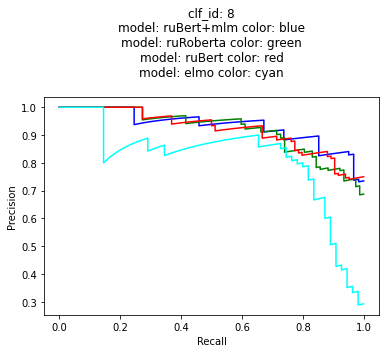

########################
clf_id 77
model_name: ELMO
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       634
           1       0.86      0.72      0.79        89

    accuracy                           0.95       723
   macro avg       0.91      0.85      0.88       723
weighted avg       0.95      0.95      0.95       723

elmo_recall 0.7191011235955056
elmo_precision 0.8648648648648649

model_name: ruBert+mlm
threshold: 0.9
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       627
           1       0.96      0.76      0.85        96

    accuracy                           0.96       723
   macro avg       0.96      0.88      0.91       723
weighted avg       0.96      0.96      0.96       723

elmo_recall 0.7191011235955056
elmo_precision 0.8648648648648649

model_name: ruRoberta
threshold: 0.8
              precision    recall  f1-score   support

           0       0.96      0.9

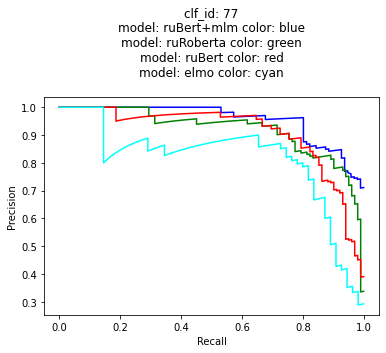

########################
clf_id 66
model_name: ELMO
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       252
           1       0.77      0.72      0.74        50

    accuracy                           0.92       302
   macro avg       0.86      0.84      0.85       302
weighted avg       0.92      0.92      0.92       302

elmo_recall 0.72
elmo_precision 0.7659574468085106

model_name: ruBert+mlm
threshold: 0.7
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       248
           1       0.84      0.76      0.80        54

    accuracy                           0.93       302
   macro avg       0.89      0.86      0.88       302
weighted avg       0.93      0.93      0.93       302

elmo_recall 0.72
elmo_precision 0.7659574468085106

model_name: ruRoberta
threshold: 0.7
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       245
      

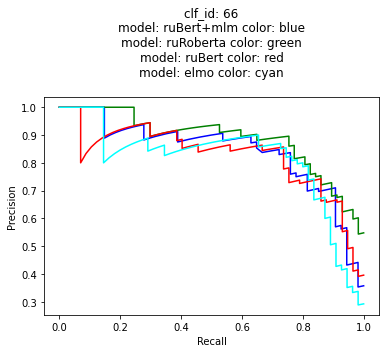

########################
clf_id 40
model_name: ELMO
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       352
           1       0.79      0.80      0.79        55

    accuracy                           0.94       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.94      0.94      0.94       407

elmo_recall 0.8
elmo_precision 0.7857142857142857

model_name: ruBert+mlm
threshold: 0.4
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       345
           1       0.74      0.87      0.80        62

    accuracy                           0.93       407
   macro avg       0.86      0.91      0.88       407
weighted avg       0.94      0.93      0.94       407

elmo_recall 0.8
elmo_precision 0.7857142857142857

model_name: ruRoberta
threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       361
        

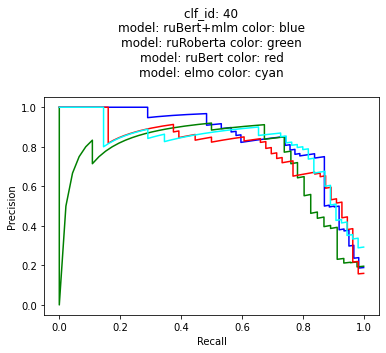

In [14]:
for clf_id, v in d.items():
    print('########################')
    print(f'clf_id {clf_id}')
    print('model_name: ELMO')
    print(d_elmo_metrics[clf_id][1])    
    fig, ax = plt.subplots()
    colors_iter = iter(['blue','green','red','cyan','magenta','yellow','black'])
    model_color = dict()
    for model_name, param in v.items():
        color = next(colors_iter)
        model_color[model_name] = color    
        if model_name == 'elmo':
            y = param[0]
            predictions = param[1]
            precision, recall, _ = precision_recall_curve(y, predictions)
        else:
            y = param[0]
            predictions = [aa.tolist()[0] for aa in param[1]]
            precision, recall, _ = precision_recall_curve(y, predictions)
        
        
        ax.plot(recall, precision, color=color)
        if model_name != 'elmo':
            get_best_prec_f1(y, predictions, model_name, d_elmo_metrics[clf_id][0], d_elmo_metrics[clf_id][2])
    title = f'clf_id: {clf_id}\n'
    for m, c in model_color.items():
        title += f'model: {m} color: {c}\n'
    ax.set_title(title)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()


## Anton

In [47]:
def get_prec_rec(OLD_THR, y_new, pred_new, y_old, pred_old):
    old_prec, old_rec, old_thr = precision_recall_curve(y_old, pred_old)
    new_prec, new_rec, new_thr = precision_recall_curve(y_new, pred_new)

    old_thr_idx = np.where(old_thr > OLD_THR)[0].min()
    
    old_rec_at_thr = old_rec[old_thr_idx]
    old_prec_at_thr = old_prec[old_thr_idx]

    new_thr_at_old_rec = np.where(new_rec <= old_rec_at_thr)[0].min()

    new_rec_at_old_rec = new_rec[new_thr_at_old_rec]
    new_prec_at_old_rec = new_prec[new_thr_at_old_rec]
    return new_prec_at_old_rec, old_prec_at_thr

'40'

In [107]:
pr_rc = defaultdict()


        
for t_file in transformers_files:
    with open(f'{path_transformers}{t_file}', 'rb') as f:
        pred_new, y_new = pickle.load(f) 
        
    pred_new = [aa.tolist()[0] for aa in pred_new]
    clf_n = ''.join([s for s in t_file if s.isdigit()])
    print(f'clf_n {clf_n}')  
    elmo_file = f'elmo_{clf_n}_precision_recall_curve.pkl'
    
    with open(f'{path_elmo}{elmo_file}', 'rb') as f:
        y_old, pred_old = pickle.load(f)
        
    OLD_THR = thresholds_elmo[int(clf_n)]
    
    new_prec_at_old_rec, old_prec_at_thr = get_prec_rec(OLD_THR, y_new, pred_new, y_old, pred_old)
    print(f'OLD_THR {OLD_THR}')
    print(f'model {t_file}')
    print(f'new_prec_at_old_rec {new_prec_at_old_rec}')
    print(f'old_prec_at_thr {old_prec_at_thr}')    

clf_n 66
OLD_THR 0.6
model 66_sberbank-ai_ruBert-large_mlm_TRUE.pkl
new_prec_at_old_rec 0.8444444444444444
old_prec_at_thr 0.7659574468085106
clf_n 66
OLD_THR 0.6
model 66_sberbank-ai_ruRoberta-large_mlm_False.pkl
new_prec_at_old_rec 0.8913043478260869
old_prec_at_thr 0.7659574468085106
clf_n 66
OLD_THR 0.6
model 66_sberbank-ai_ruBert-large_mlm_False.pkl
new_prec_at_old_rec 0.8541666666666666
old_prec_at_thr 0.7659574468085106
clf_n 77
OLD_THR 0.5
model 77_sberbank-ai_ruBert-large_mlm_TRUE.pkl
new_prec_at_old_rec 0.9583333333333334
old_prec_at_thr 0.8648648648648649
clf_n 77
OLD_THR 0.5
model 77_sberbank-ai_ruRoberta-large_mlm_False.pkl
new_prec_at_old_rec 0.9012345679012346
old_prec_at_thr 0.8648648648648649
clf_n 77
OLD_THR 0.5
model 77_sberbank-ai_ruBert-large_mlm_False.pkl
new_prec_at_old_rec 0.9240506329113924
old_prec_at_thr 0.8648648648648649
clf_n 8
OLD_THR 0.5
model 8_sberbank-ai_ruBert-large_mlm_TRUE.pkl
new_prec_at_old_rec 0.828125
old_prec_at_thr 0.875
clf_n 8
OLD_THR 0.5
m

In [96]:
aa = pred_old[0]
aa?

Type:        float32
String form: 0.16769585
File:        /home/user/conda/lib/python3.7/site-packages/numpy/__init__.py
Docstring:  
Single-precision floating-point number type, compatible with C ``float``.

:Character code: ``'f'``
:Canonical name: `numpy.single`
:Alias on this platform (Linux x86_64): `numpy.float32`: 32-bit-precision floating-point number type: sign bit, 8 bits exponent, 23 bits mantissa.


In [97]:
aa = pred_new[0]
aa?

Type:        int64
String form: 0
File:        /home/user/conda/lib/python3.7/site-packages/numpy/__init__.py
Docstring:  
Signed integer type, compatible with Python `int` and C ``long``.

:Character code: ``'l'``
:Canonical name: `numpy.int_`
:Alias on this platform (Linux x86_64): `numpy.int64`: 64-bit signed integer (``-9_223_372_036_854_775_808`` to ``9_223_372_036_854_775_807``).
:Alias on this platform (Linux x86_64): `numpy.intp`: Signed integer large enough to fit pointer, compatible with C ``intptr_t``.
